# Time series analysis

In [69]:
library(forecast) # library from the book
library(ggplot2) 

## Varicelle dataset

We get the data

In [11]:
varicelle=read.csv('http://eric.univ-lyon2.fr/~jjacques/Download/DataSet/varicelle.csv')

We transform the data into a time serie

In [12]:
varicelle=ts(varicelle$x,start=c(1931,1), end=c(1972,6), freq=12)

We plot the time serie

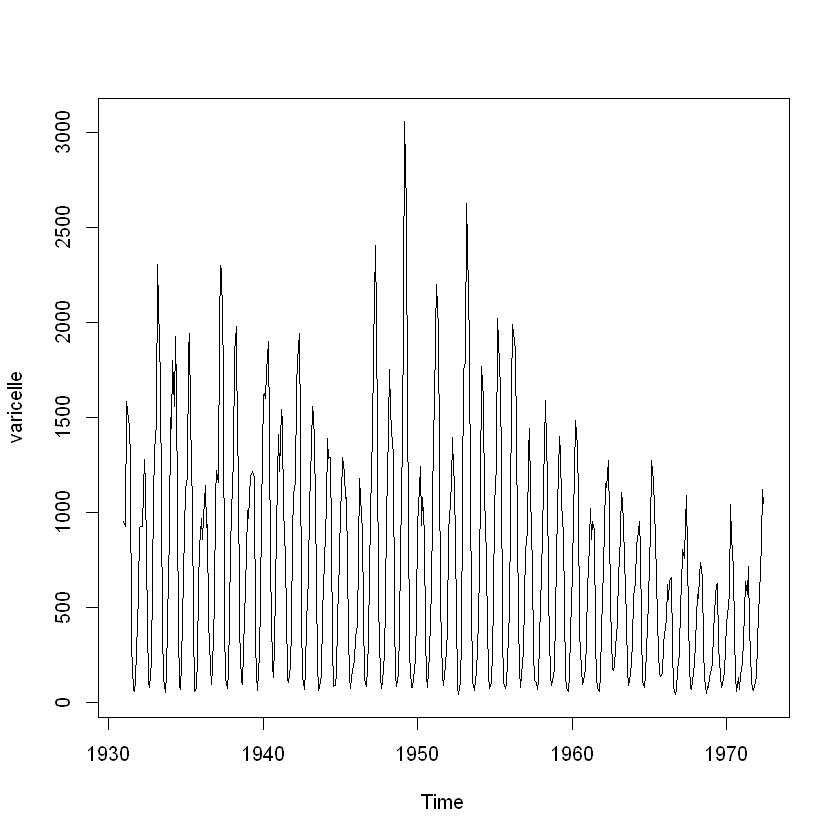

In [13]:
plot(varicelle)

We calculate the mean

In [17]:
mean(varicelle)

[1] 732.4076

We plot the correlogram: auto-correlation of increasing order

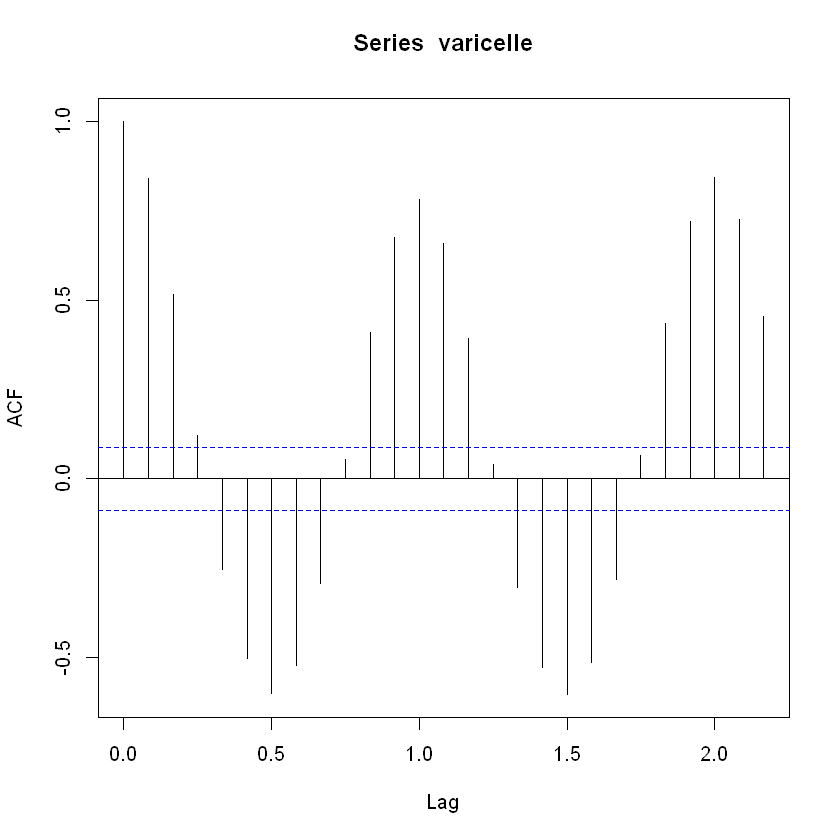

In [18]:
acf(varicelle, type='cor')

We plot the seasons

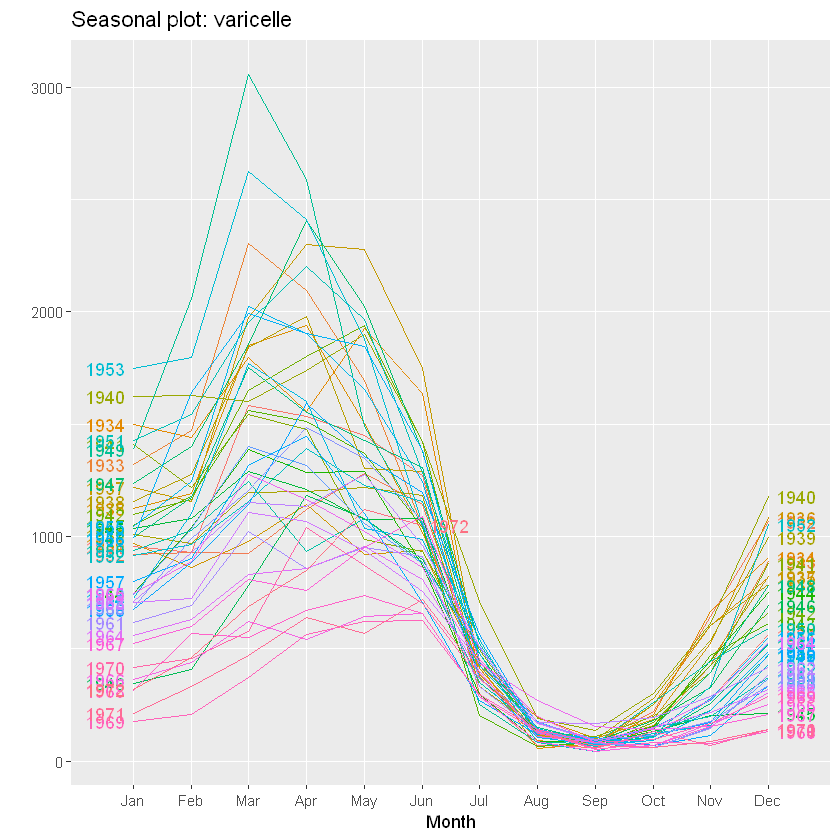

In [22]:
ggseasonplot(varicelle,year.labels= TRUE,year.labels.left=TRUE)

We plot the mean per year to check the trend

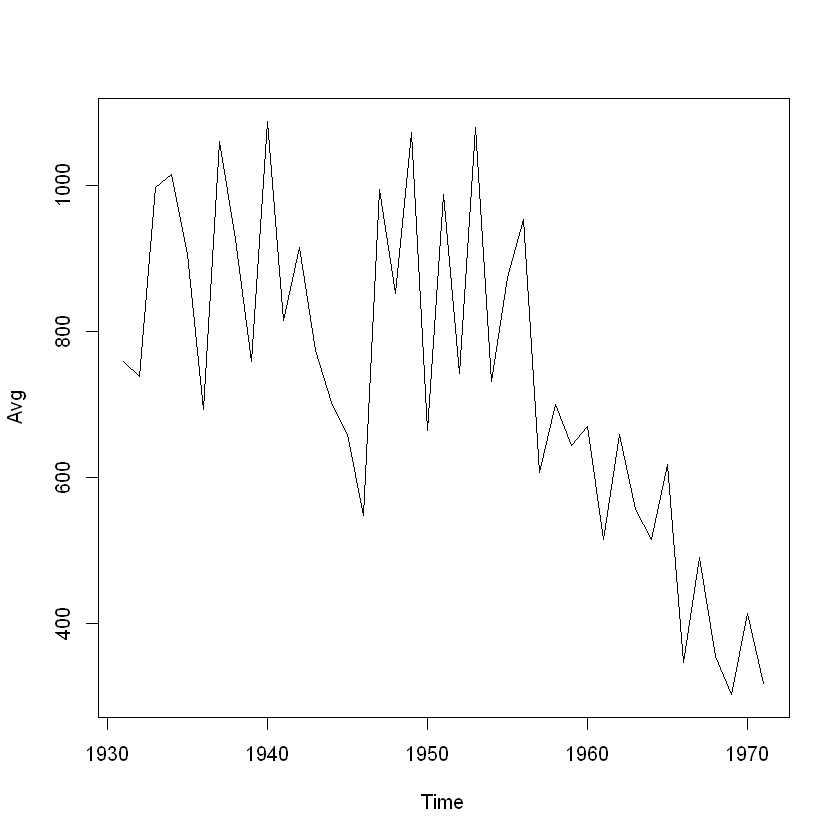

In [68]:
for (i in 1:(round(length(varicelle)/12)-1))
     {
         lb=(12*(i-1))+1
         up=12*i
         Avg[i]=mean(varicelle[lb:up])
     }
Avg=ts(Avg,start=c(1931), end=c(1971), freq=1)
plot(Avg)

## Predictions on livestocks dataset

In [83]:
library(fpp)
library(forecast)

In [84]:
data(livestock)

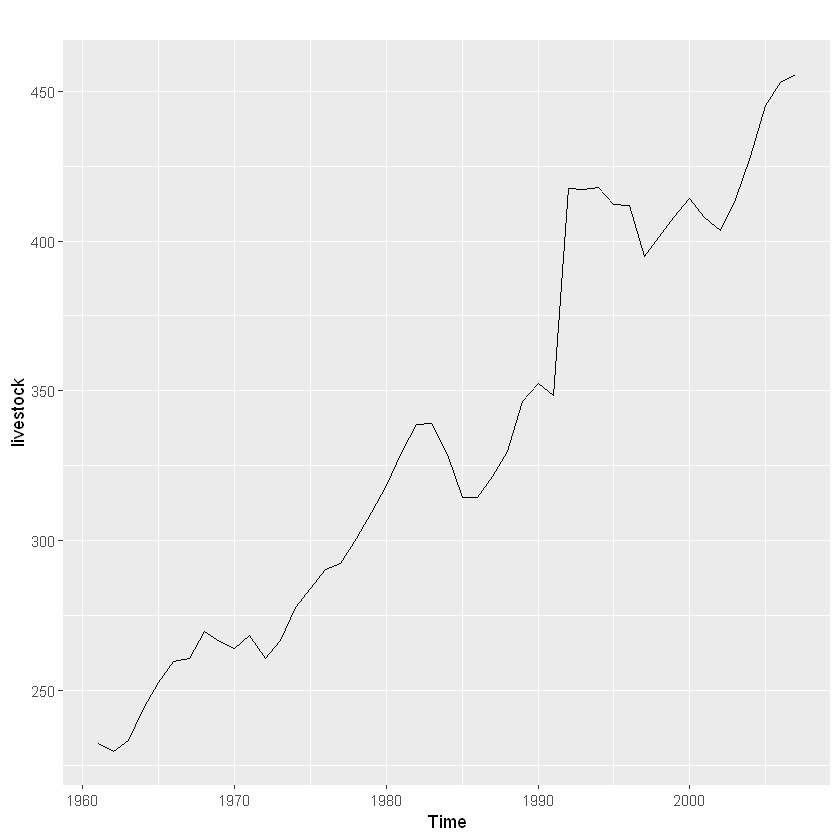

In [88]:
autoplot(livestock)

In [93]:
livestock_testing=tail(livestock,10)
livestock_training=head(livestock,37)

In [97]:
mod1=ses(livestock_training,h=10)
mod2=holt(livestock_training,h=10)
mod3=holt(livestock_training,h=10, damped=TRUE)

In [104]:
sqrt(mean((predict(mod1,n.ahead=10)$mean-livestock_testing)^2))
sqrt(mean((predict(mod2,n.ahead=10)$mean-livestock_testing)^2))
sqrt(mean((predict(mod3,n.ahead=10)$mean-livestock_testing)^2))

[1] 34.69384

[1] 10.20587

[1] 23.52408

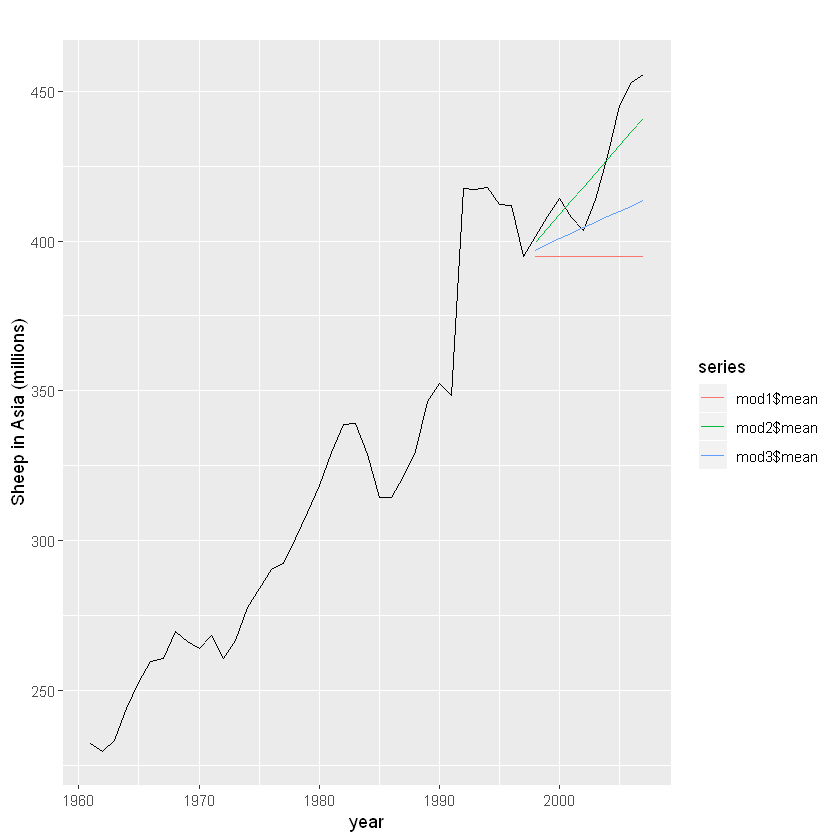

In [112]:
autoplot(livestock) + autolayer(mod1$mean) + autolayer(mod2$mean) +autolayer(mod3$mean)+ xlab("year") + ylab("Sheep in Asia (millions)")